<a href="https://colab.research.google.com/github/Vinni22Z/Analise-HUOL-2023/blob/main/Analise_HUOL_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise das Internações Hospitalares no Hospital Universitário Onofre Lopes (HUOL) em 2023

#Contexto e Motivação
O Hospital Universitário Onofre Lopes (HUOL), unidade integrante da Rede Ebserh e vinculado à UFRN, é uma referência no atendimento hospitalar e ensino médico no Rio Grande do Norte. Entender o perfil das internações realizadas nessa instituição em 2023 é fundamental para aprimorar a gestão hospitalar, otimizar recursos e garantir uma assistência de qualidade à população atendida. Além disso, o HUOL tem um papel crucial no ensino, pesquisa e extensão, tornando os dados sobre internações relevantes para múltiplos setores.

#O Projeto
Este estudo utiliza dados oficiais disponibilizados pela Ebserh referentes às internações hospitalares no HUOL durante o ano de 2023. O conjunto de dados contempla informações detalhadas como:

* Data e horário da internação

* Especialidade médica responsável

* Município de residência dos pacientes

* Idade e sexo dos internados

#Análise Temporal
Um foco importante da análise é a avaliação temporal das internações ao longo do ano, permitindo identificar tendências, variações sazonais e possíveis eventos que impactaram a demanda hospitalar no HUOL durante 2023.

#Objetivos da Análise
O estudo busca responder questões práticas e relevantes:

* Quais especialidades registraram maior volume de internações no HUOL em 2023?

* Como está distribuída a demanda por internação segundo a origem municipal dos pacientes?

* Quais perfis demográficos (idade e sexo) predominam nas internações?

* Existem variações sazonais ou mensais significativas nas internações ao longo do ano?

# Impacto Esperado
A transformação desses dados em insights relevantes visa contribuir para:

* A gestão do HUOL, auxiliando no planejamento e alocação eficiente de recursos

* Profissionais de saúde e docentes, ao compreenderem melhor o perfil dos pacientes atendidos

* Pesquisadores que atuam nas áreas de saúde pública e gestão hospitalar

* A sociedade, por meio do aprimoramento contínuo da qualidade do atendimento hospitalar

Este projeto oferece uma oportunidade singular para mapear e compreender o perfil das internações hospitalares no HUOL em 2023, fundamentando decisões estratégicas e contribuindo para o fortalecimento do hospital como instituição de excelência.

#IMPORTANDO BIBLIOTECAS E DADOS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Vamos importar nosso Dataset
df = pd.read_csv('Internaçoes_Hospitalares_2023.csv', encoding='latin1', sep=';')

#ANALISANDO DATASET

Descrição das variáveis do DataFrame
* `DataInternacao` — Data e hora da internação do paciente (índice do DataFrame).

* `Especialidade` — Especialidade médica relacionada ao atendimento.

* `Municipio` — Município onde o atendimento foi realizado.

* `Idade` — Idade do paciente no momento do atendimento.

* `Sexo` — Sexo do paciente (Masculino/Feminino).



In [3]:
#Veremos nossas 8 primeiras entradas
df.head(8)

,NOME DA BASE: Internações Hospitalares,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,DESCRIÇÃO DA BASE: Número de internações hospi...,NaN,NaN,NaN,NaN,NaN
1,PERÍODO DE REFERÊNCIA: Ano de 2023,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Data/Hora_ Internação,Especialidade,Município,Idade,Sexo,NaN
4,01/01/2023 01:12,MEDICINA INTENSIVA,NATAL,42,FEMININO,NaN
5,01/01/2023 05:09,CARDIOLOGIA,Macaíba,45,MASCULINO,NaN
6,01/01/2023 10:26,NEUROLOGIA,JARDIM DO SERIDÓ,71,FEMININO,NaN
7,02/01/2023 07:19,ONCOLOGIA CLÍNICA,NATAL,63,MASCULINO,NaN


In [4]:
#E as 8 ultimas
df.tail(8)

,NOME DA BASE: Internações Hospitalares,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
6059,30/12/2023 11:51,NEUROCIRURGIA,PAU DOS FERROS,58,FEMININO,NaN
6060,30/12/2023 18:05,PEDIATRIA,NATAL,5,MASCULINO,NaN
6061,30/12/2023 20:50,POS-TRANSPLANTE,SANTA MARIA,75,FEMININO,NaN
6062,30/12/2023 21:42,REUMATOLOGIA,NATAL,51,FEMININO,NaN
6063,31/12/2023 08:59,CIRURGIA TORÁCICA,NATAL,38,MASCULINO,NaN
6064,31/12/2023 15:19,ONCOLOGIA HEMATOLOGIA,FLORÂNIA,24,MASCULINO,NaN
6065,31/12/2023 21:36,ONCOLOGIA CLÍNICA,PARNAMIRIM,28,FEMININO,NaN
6066,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Veremos a estrutura, tipos de dados e a presença de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6067 entries, 0 to 6066
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NOME DA BASE: Internações Hospitalares  6065 non-null   object 
 1   Unnamed: 1                              6063 non-null   object 
 2   Unnamed: 2                              6063 non-null   object 
 3   Unnamed: 3                              6063 non-null   object 
 4   Unnamed: 4                              6063 non-null   object 
 5   Unnamed: 5                              0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 284.5+ KB


In [6]:
# Obtém o formato (número de linhas e colunas) do conjunto de dados
df.shape

(6067, 6)

#LIMPEZA E PRÉ-PROCESSAMENTO DOS DADOS

As três primeiras linhas são metadados
elas não contêm dados úteis, então vamos eliminá-las

In [7]:
df=df.iloc[4:].reset_index(drop=True)
df.head()

,NOME DA BASE: Internações Hospitalares,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,01/01/2023 01:12,MEDICINA INTENSIVA,NATAL,42,FEMININO,NaN
1,01/01/2023 05:09,CARDIOLOGIA,Macaíba,45,MASCULINO,NaN
2,01/01/2023 10:26,NEUROLOGIA,JARDIM DO SERIDÓ,71,FEMININO,NaN
3,02/01/2023 07:19,ONCOLOGIA CLÍNICA,NATAL,63,MASCULINO,NaN
4,02/01/2023 07:54,CIRURGIA VASCULAR,NATAL,66,FEMININO,NaN


Como os nomes das colunas estão incorretos, faremos a renomeação para corrigi-los, além da remoção da coluna 'Unnamed: 5', que contém apenas valores nulos

In [8]:
#Remover a coluna 'Unnamed: 5'
df=df.drop('Unnamed: 5', axis=1)

In [9]:
#Renomear colunas
df.columns=['DataInternacao', 'Especialidade', 'Municipio', 'Idade', 'Sexo']
df.head()

,DataInternacao,Especialidade,Municipio,Idade,Sexo
0,01/01/2023 01:12,MEDICINA INTENSIVA,NATAL,42,FEMININO
1,01/01/2023 05:09,CARDIOLOGIA,Macaíba,45,MASCULINO
2,01/01/2023 10:26,NEUROLOGIA,JARDIM DO SERIDÓ,71,FEMININO
3,02/01/2023 07:19,ONCOLOGIA CLÍNICA,NATAL,63,MASCULINO
4,02/01/2023 07:54,CIRURGIA VASCULAR,NATAL,66,FEMININO


Neste trecho, renomeamos as colunas do DataFrame para nomes mais claros e padronizados, facilitando a compreensão dos dados durante a análise. Em seguida, usamos o método .head() para exibir as primeiras linhas e verificar se as alterações foram aplicadas corretamente.

In [10]:
#Vamos identificar se existe valores duplicados
print(df.duplicated().sum())

0


* Verificou-se que o conjunto não possui valores duplicados. Isso significa que, para as colunas analisadas, cada linha representa um registro único, sem repetições ou redundâncias. A ausência de duplicatas garante maior consistência e confiabilidade das informações, facilitando interpretações e evitando viés ou distorções nas análises estatísticas e nos resultados obtidos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6063 entries, 0 to 6062
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DataInternacao  6062 non-null   object
 1   Especialidade   6062 non-null   object
 2   Municipio       6062 non-null   object
 3   Idade           6062 non-null   object
 4   Sexo            6062 non-null   object
dtypes: object(5)
memory usage: 237.0+ KB


O resumo mostra que o DataFrame possui 6.063 registros e 5 colunas, todas do tipo objeto (texto). Cada coluna apresenta um valor nulo, indicando a presença de dados faltantes que devem ser tratados

* VAMOS DAR UMA OLHADA NESSES VALORES NULOS

In [12]:
linhas_nulas = df[df.isnull().any(axis=1)]
print(linhas_nulas)

     DataInternacao Especialidade Municipio Idade Sexo
6062            NaN           NaN       NaN   NaN  NaN


* A verificação de valores ausentes revelou que existe um único registro (linha 6062) com dados faltantes em todas as colunas: `DataInternacao`, `Especialidade`, `Municipio`, `Idade` e `Sexo`. Isso indica que a base de dados está praticamente completa, com apenas esse registro contendo informações ausentes

In [13]:
#Vamos remover essa linha
df=df.drop(index=6062)

* Linha removida

In [14]:
# Coluna 'idade' de object para float
df['Idade']=pd.to_numeric(df['Idade'].str.strip())
print(f"coluna Idade é do tipo {df['Idade'].dtype}")

coluna Idade é do tipo int64


* DURANTE O TRATAMENTO DOS DADOS, A COLUNA `Idade` FOI CONVERTIDA DE TEXTO PARA NÚMERO, GARANTINDO ANÁLISES CORRETAS E EVITANDO ERROS DE FORMATAÇÃO. COM ISSO, A BASE FICOU MAIS CONSISTENTE E PRONTA PARA COMPARAÇÕES PRECISAS.







#Analizando outlaiers

In [15]:
df.describe()

,Idade
count,6062.000000
mean,46.383042
std,23.174291
min,0.000000
25%,30.000000
50%,50.000000
75%,64.000000
max,102.000000


* No conjunto de dados, o valor mínimo de Idade é 0, o que pode representar internações de recém-nascidos com menos de 1 ano de idade. O valor máximo é 102 anos, indicando pacientes em idade avançada. Ambos os valores estão dentro de parâmetros considerados plausíveis para registros hospitalares. Portanto, não há indícios de outliers extremos na variável Idade.

AGORA VAMOS TRANSFORMAR A COLUNA `DataInternacao` EM DATATIME E INDEX PARA CONSEGUIR FAZER ANALISES TEMPORAIS

In [16]:
# 'DataInternacao' para datatime
df['DataInternacao']=pd.to_datetime(df['DataInternacao'],format= '%d/%m/%Y %H:%M')
# 'DataInternacao' para index
df=df.set_index('DataInternacao')
df.head(2)

,Especialidade,Municipio,Idade,Sexo
DataInternacao,,,,
2023-01-01 01:12:00,MEDICINA INTENSIVA,NATAL,42,FEMININO
2023-01-01 05:09:00,CARDIOLOGIA,Macaíba,45,MASCULINO


* Concluímos a etapa de tratamento e pré-processamento dos dados, assegurando sua integridade e adequação para análise. A seguir, iniciaremos a fase de Análise Exploratória de Dados (EDA), com o objetivo de identificar padrões, tendências e informações relevantes que sustentem as etapas subsequentes do projeto

# ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

# * Quais especialidades registraram maior volume de internações

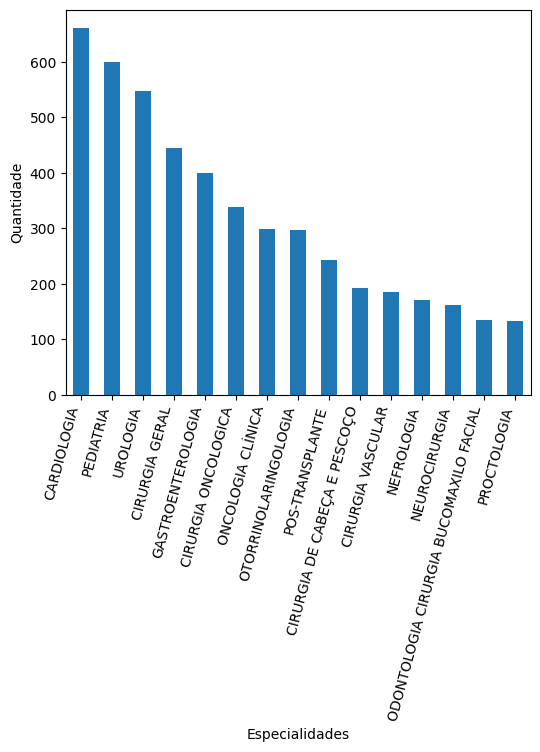

In [17]:
df['Especialidade'].value_counts().head(15).plot.bar(figsize=(6,5))
plt.xticks(rotation=75, ha='right')
plt.xlabel('Especialidades')
plt.ylabel('Quantidade')
plt.show()

* Os dados revelam que as especialidades com maior volume de internações foram, principalmente, 'Cardiologia', 'Pediatria' e 'Urologia', indicando que doenças cardíacas, condições infantis e tratamentos relacionados ao câncer representam uma parcela significativa da demanda hospitalar. Especialidades cirúrgicas, como 'Cirurgia Geral' e 'Cirurgia Oncológica', também se destacam entre as mais frequentes, reforçando a importância desses serviços na assistência à saúde. Essa distribuição evidencia o impacto das doenças crônicas e do cuidado intensivo em diferentes faixas etárias, orientando gestores e profissionais na priorização de recursos e estratégias para o atendimento hospitalar

#Como está distribuída a demanda por internação segundo a origem municipal dos pacientes

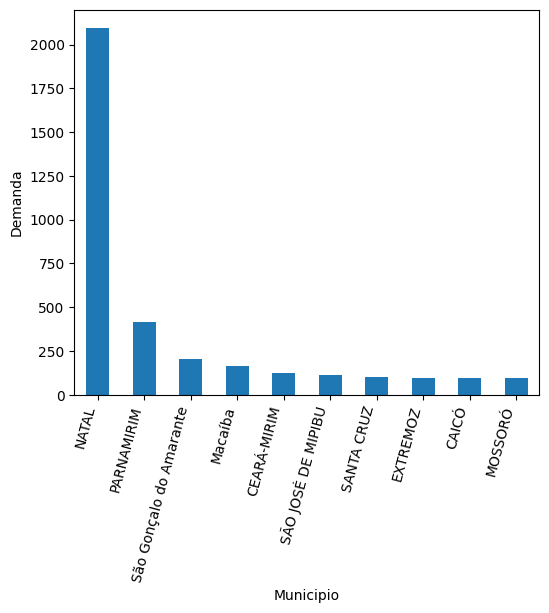

In [18]:
df['Municipio'].value_counts().head(10).plot.bar(figsize=(6,5))
plt.xticks(rotation=75, ha='right')
plt.xlabel('Municipio')
plt.ylabel('Demanda')
plt.show()

* Observa-se que a maior demanda por internações é proveniente do município de Natal, destacando-se de forma expressiva em relação aos demais municípios. Esse número elevado se explica, principalmente, pelo fato de o hospital analisado estar localizado em Natal, o que naturalmente facilita o acesso da população local aos serviços de saúde e contribui para a concentração dos registros de internação. Os demais municípios apresentam demandas significativamente menores, reforçando o papel central que Natal desempenha como polo de referência hospitalar na região

#Quais perfis demográficos (idade e sexo) predominam nas internações


* Vamos ver tanbem como esta a estatísticas descritivas da coluna `Idade`

In [19]:
df['Idade'].describe()

,Idade
count,6062.000000
mean,46.383042
std,23.174291
min,0.000000
25%,30.000000
50%,50.000000
75%,64.000000
max,102.000000


A idade média do grupo é de 46 anos, enquanto a idade mediana é de 50 anos.

Isso indica que metade das pessoas tem mais de 50 anos. A faixa etária é bastante diversa, indo de recém-nascidos a 102 anos, com a maior concentração de indivíduos na faixa entre 30 e 64 anos.

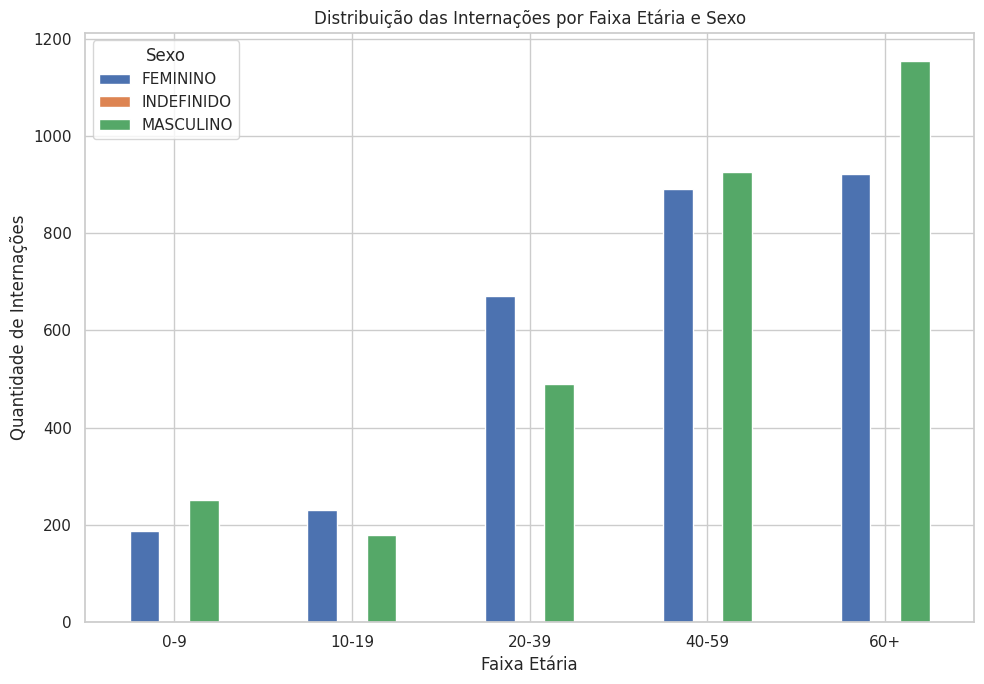

In [26]:
intervalo = [0, 9, 19, 39, 59, 120]
nome_faixa = ['0-9', '10-19', '20-39', '40-59', '60+']
df['Faixa Etaria'] = pd.cut(df['Idade'], bins=intervalo, labels=nome_faixa, right=True)

# Contagem por faixa etária e sexo
contagem = df.groupby(['Faixa Etaria', 'Sexo'], observed=False).size().unstack()

# Plotar gráfico de barras agrupadas
contagem.plot(kind='bar', figsize=(10, 7))
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Internações')
plt.title('Distribuição das Internações por Faixa Etária e Sexo')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show();

O gráfico revela que o perfil das internações hospitalares varia de acordo com a idade e o sexo.

* Na infância (0-9 anos), as internações masculinas são mais frequentes. O cenário se inverte na juventude, com um pico acentuado de internações femininas na faixa de 20-39 anos, provavelmente ligado à área materno-infantil, com destaque para os partos.

* A partir dos 40 anos, os homens voltam a liderar o número de internações, e essa diferença aumenta significativamente no grupo de 60 anos ou mais, que concentra o maior volume geral de hospitalizações.

* Em resumo, os dados mostram um pico de necessidade de internação para mulheres que ganham bebês e uma crescente demanda para homens a partir da meia-idade.

#Distribuição da Idade por Especialidade e Sexo

In [21]:
cruzamento=df.groupby(['Idade','Sexo','Especialidade']).size().reset_index(name='total')

In [22]:
cruzamento.head()

,Idade,Sexo,Especialidade,total
0,0,FEMININO,CARDIOLOGIA PEDIÁTRICA,2
1,0,FEMININO,NEFROLOGIA PEDIÁTRICA,5
2,0,FEMININO,NEUROLOGIA PEDIÁTRICA,1
3,0,FEMININO,PEDIATRIA,46
4,0,MASCULINO,CARDIOLOGIA PEDIÁTRICA,1


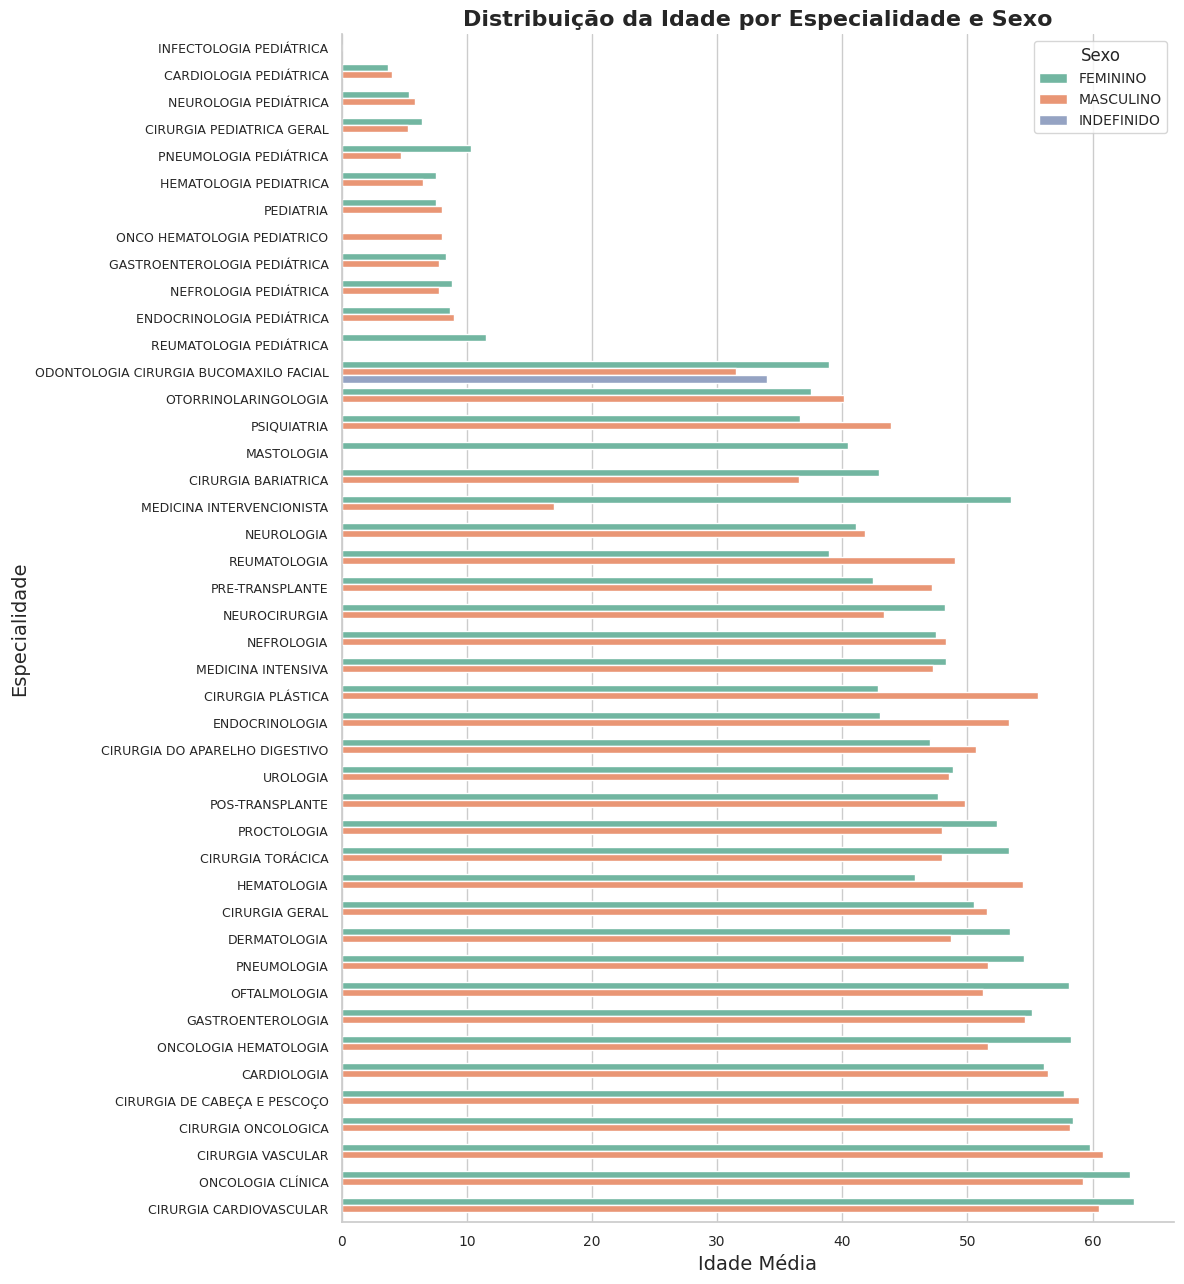

In [23]:
sns.set_theme(style="whitegrid")

# Ordenando especialidades pela média de idade
ordem_especialidades = (
    cruzamento.groupby("Especialidade")["Idade"]
    .mean()
    .sort_values()
    .index
)

plt.figure(figsize=(12, 13))
sns.barplot(
    data=cruzamento,
    x="Idade",
    y="Especialidade",
    hue="Sexo",
    dodge=True,
    order=ordem_especialidades,
    palette="Set2",
    errorbar=None
)


plt.title("Distribuição da Idade por Especialidade e Sexo", fontsize=16, weight='bold')
plt.xlabel("Idade Média", fontsize=14)
plt.ylabel("Especialidade", fontsize=14)
plt.legend(title="Sexo", fontsize=10, title_fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)


sns.despine()

plt.tight_layout()
plt.show()

As especialidades pediátricas concentram as menores idades médias, enquanto áreas como cardiologia, oncologia e cirurgias de alta complexidade têm médias acima de 50 anos. Especialidades intermediárias, como neurocirurgia e proctologia, ficam entre 20 e 40 anos. As diferenças de idade entre sexos são pequenas na maioria dos casos, e há poucos registros com sexo “Indefinido”, distribuídos em especialidades variadas.

#variações mensais

In [24]:
# Vamos agrupar os registros por mês usando o índice temporal e contar a quantidade de casos em cada período
resultado = df.groupby(df.index.to_period('M')).size().reset_index(name='QtdInternacoes')
print(resultado)

   DataInternacao  QtdInternacoes
0         2023-01             484
1         2023-02             323
2         2023-03             399
3         2023-04             458
4         2023-05             600
5         2023-06             502
6         2023-07             548
7         2023-08             622
8         2023-09             570
9         2023-10             549
10        2023-11             506
11        2023-12             501


* Vamos plotar um grafico de Linha para visualizar

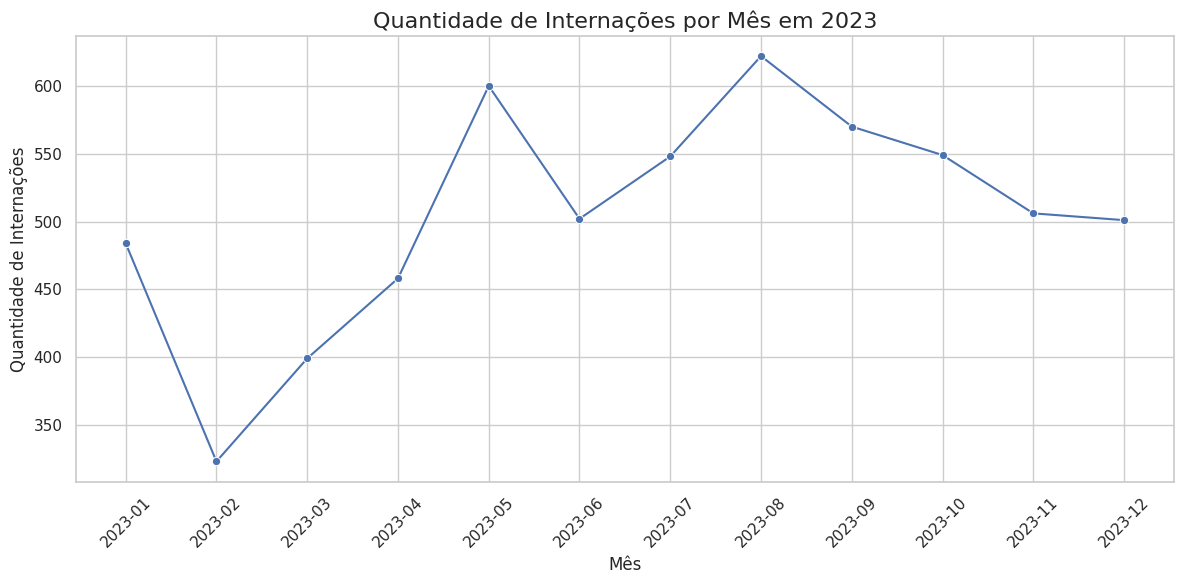

In [25]:
resultado['DataInternacao'] = resultado['DataInternacao'].astype(str)
sns.set(style="whitegrid")

plt.figure(figsize=(12,6))
sns.lineplot(data=resultado, x='DataInternacao', y='QtdInternacoes', marker='o')

plt.title('Quantidade de Internações por Mês em 2023', fontsize=16)
plt.xlabel('Mês')
plt.ylabel('Quantidade de Internações')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* O gráfico mostra a variação mensal da quantidade de internações ao longo de 2023. Observa-se um pico inicial em janeiro, seguido por uma queda significativa em fevereiro, que pode indicar sazonalidade ou fatores específicos desse período. A partir de março, há uma recuperação gradual nas internações, com destaque para os meses de maio e agosto, que apresentam os maiores números do ano, alcançando respectivamente 600 e 620 internações. Após agosto, há uma tendência de leve queda até o final do ano, mas os valores permanecem relativamente altos, acima de 500 internações por mês.

Essa tendência sugere períodos de maior demanda hospitalar na metade do ano, possivelmente relacionados a fatores sazonais, surtos ou eventos específicos. Essa informação é útil para planejamento de recursos e gestão hospitalar.

#Conclusão e Principais Descobertas
Este estudo analisou o perfil das internações hospitalares no Hospital Universitário Onofre Lopes (HUOL) durante o ano de 2023, utilizando dados oficiais da Ebserh. O objetivo foi compreender quais especialidades concentram mais atendimentos, de onde vêm os pacientes, qual é o perfil demográfico e como essas internações variam ao longo do ano.

#Distribuição por Especialidade
As especialidades com maior volume de internações foram 'Cardiologia', 'Pediatria' e 'Urologia', indicando alta demanda por tratamentos cardiovasculares, cuidados infantis e sistema urinario e reprodutor. Especialidades cirúrgicas, como 'Cirurgia Geral' e 'Cirurgia Oncológica', também se destacaram, evidenciando a importância desses procedimentos para a população atendida.

#Distribuição Geográfica
A maior parte dos pacientes é proveniente de Natal, município onde está localizado o HUOL. Isso reforça o papel do hospital como centro de referência para a capital e região metropolitana. Municípios do interior registraram volumes muito menores, possivelmente pela distância e pela centralização da infraestrutura.

#Perfil Demográfico
A idade média dos pacientes foi de 46 anos, e a mediana de 50 anos.

* Crianças (0-9 anos): mais internações entre meninos, principalmente em pediatria.

* Jovens adultos (20-39 anos): prevalência feminina, possivelmente associada a internações materno-infantis e partos.

* A partir dos 40 anos: maior número de hospitalizações entre homens, especialmente em cardiologia e oncologia.

* O público idoso (60+) concentrou o maior número de internações, refletindo o impacto das doenças crônicas e degenerativas.

#Idade por Especialidade
Especialidades pediátricas apresentam as menores idades médias (0 a 9 anos), enquanto Cardiologia, Oncologia e Cirurgias de Alta Complexidade concentram pacientes acima de 50 anos. Áreas intermediárias, como Neurocirurgia e Proctologia, apresentaram idades médias entre 20 e 40 anos.

#Análise Temporal das Internações
O gráfico de internações mensais mostrou uma variação ao longo de 2023, com pico inicial em janeiro, seguida por queda acentuada em fevereiro, indicando possível sazonalidade ou fatores específicos desse período. A partir de março, observou-se recuperação gradual, destacando os meses de maio e agosto como os de maior demanda (aproximadamente 600 e 620 internações, respectivamente). Após agosto, há tendência de leve redução, mantendo-se acima de 500 internações mensais. Esse padrão sugere períodos de maior demanda hospitalar na metade do ano, possivelmente relacionados a fatores sazonais, surtos ou eventos específicos.

#Próximos Passos

* Comparar as internações do HUOL com outros hospitais da rede Ebserh.

* Criar modelos preditivos para antecipar a demanda e otimizar recursos.

#RESUMO
A análise mostrou que Cardiologia, Pediatria e Urologia lideram as internações no HUOL. O maior fluxo de pacientes vem de Natal, com o perfil etário variando de crianças a idosos, mas com forte presença de homens acima dos 40 anos e mulheres jovens adultas. A variação mensal das internações evidencia picos em janeiro, maio e agosto, oferecendo subsídios importantes para planejamento estratégico e gestão hospitalar